2.1 Import Required Libraries
--------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2.2 Loading the Dataset
------

In [2]:
df=pd.read_csv("C:/Users/nikhi/Downloads/Customer_Segmentation/data.csv",encoding="ISO-8859-1")

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [4]:
#description of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Description of the Columns
---

In [5]:
#Statistics of numerical columns
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [6]:
#Summary of categorical columns
df.describe(include="object").T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                    10/31/2011 14:41    1114
Country      541909     38                      United Kingdom  495478

Inferences
-
__Quantity:__                                                                                                                                           
The average quantity of products in a transaction is approximately 9.55.
The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or cancelled orders, which need to be handled appropriately.
The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.                                                                                                             
__UnitPrice:__                                                                                                                                          
The average unit price of the products is approximately 4.61.                                                                                           
The unit price also shows a wide range, from -11062.06 to 38970, which suggests the presence of errors or noise in the data, as negative prices don't   make sense.                                                                                                                                             
Similar to the Quantity column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.         
__CustomerID:__                                                                                                                                         
There are 406829 non-null entries, indicating missing values in the dataset which need to be addressed.                                                 
The Customer IDs range from 12346 to 18287, helping in identifying unique customers.                                                                    
__InvoiceNo:__                                                                                                                                          
There are 25900 unique invoice numbers, indicating 25900 separate transactions.                                                                         
The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.            
__StockCode:__                                                                                                                                          
There are 4070 unique stock codes representing different products.                                                                                      
The most frequent stock code is 85123A, appearing 2313 times in the dataset.                                                                            
__Description:__                                                                                                                                        
There are 4223 unique product descriptions.                                                                                                             
The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times.                                                    
There are some missing values in this column which need to be treated.                                                                                  
__Country:__                                                                                                                                            
The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United       Kingdom.

In [7]:
#Knowing the percentage of Blanks in CustomerID and Description
print("Percentage of Empty Blanks in CustomerID is {:.2f} %".format(df['CustomerID']
                                                                    .isnull().sum()/df.shape[0]*100))
print("Percentage of Empty Blanks in Description is {:.2f} %".format(df['Description']
                                                                     .isnull().sum()/df.shape[0]*100))

Percentage of Empty Blanks in CustomerID is 24.93 %
Percentage of Empty Blanks in Description is 0.27 %


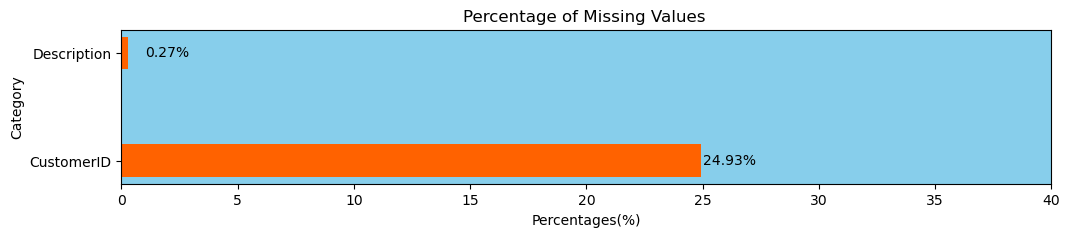

In [8]:
#Ploting Bar Graph
Categories=["CustomerID","Description"]
Percentages=[(df['CustomerID'].isnull().sum()/df.shape[0]*100),(df['Description']
                                                                .isnull().sum()/df.shape[0]*100)]
fig,ax=plt.subplots(figsize=(12,2))
bars=ax.barh(Categories,Percentages,color='#ff6200',height=0.3)
ax.set_xlim([0,40])
ax.set_facecolor('skyblue')
for bar,percentage in zip(bars,Percentages):
    ax.text(int(percentage)+1,bar.get_y()+bar.get_height()/2,
                                                    f"{percentage:.2f}%",ha="left",va="center")
ax.set_xlabel("Percentages(%)")
ax.set_ylabel("Category")
ax.set_title("Percentage of Missing Values ")
plt.show()

In [9]:
#Extract the Rows which are having missing values in Customer ID and Description
df[df["CustomerID"].isnull() | df["Description"].isnull()].head()


InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [10]:
#Removing the rows which are having empty values in CustomerID and Description
df=df.dropna(subset=["CustomerID","Description"])

In [11]:
#Size of the Dataframe after removing the empty rows
df.shape

(406829, 8)

In [12]:
#Verify still there are any other empty rows in the given dataframe
df.isnull().sum().sum()

0

In [13]:
#Duplicated rows in the dataset
duplicates=df[df.duplicated(keep=False)]
sorted_duplicates=duplicates.sort_values(by=["InvoiceNo","StockCode","Description",
                                             "CustomerID","Quantity"])
sorted_duplicates

InvoiceNo StockCode                          Description  Quantity  \
494       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
485       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
539       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
...          ...       ...                                  ...       ...   
440149   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
461407   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
461408   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
529980   C580764     22667                RECIPE BOX RETROSPOT        -12   
529981   C580764     22667                RECIPE BOX RETROSPOT        -12   

             InvoiceDate  UnitPrice  CustomerID         Country  
494      12/1/2010 11:45       1.25     17908.0  United Kingdom  
517      12/1/2010 11:45       1.25     17908.0  United Kingdom  
485      12/1/2010 11:45       4.95     17908.0  United Kingdom  
539      12/1/2010 11:45       4.95     17908.0  United Kingdom  
489      12/1/2010 11:45       2.10     17908.0  United Kingdom  
...                  ...        ...         ...             ...  
440149   11/4/2011 13:25       2.95     15110.0  United Kingdom  
461407  11/13/2011 11:38       0.55     17838.0  United Kingdom  
461408  11/13/2011 11:38       0.55     17838.0  United Kingdom  
529980   12/6/2011 10:38       2.95     14562.0  United Kingdom  
529981   12/6/2011 10:38       2.95     14562.0  United Kingdom  

[10062 rows x 8 columns]

In [14]:
#Remove the Duplicated Rows
df=df.drop_duplicates()
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[401604 rows x 8 columns]

In [15]:
df.shape[0]

401604

In [16]:
#Knowing the Cancelled Transactions these are starting with C in InvoiceNo
cancelled_rows=df[df["InvoiceNo"].str.startswith("C")]
cancelled_rows

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0  United Kingdom  
154      12/1/2010 9:49       4.65     15311.0  United Kingdom  
235     12/1/2010 10:24       1.65     17548.0  United Kingdom  
236     12/1/2010 10:24       0.29     17548.0  United Kingdom  
237     12/1/2010 10:24       0.29     17548.0  United Kingdom  
...                 ...        ...         ...             ...  
540449   12/9/2011 9:57       0.83     14397.0  United Kingdom  
541541  12/9/2011 10:28     224.69     15498.0  United Kingdom  
541715  12/9/2011 11:57      10.95     15311.0  United Kingdom  
541716  12/9/2011 11:58       1.25     17315.0  United Kingdom  
541717  12/9/2011 11:58       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [17]:
cancelled_rows.shape

(8872, 8)

In [18]:
cancelled_rows.describe().drop("CustomerID",axis=1)

Quantity     UnitPrice
count   8872.000000   8872.000000
mean     -30.774910     18.899512
std     1172.249902    445.190864
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

In [19]:
'''Creating a new Column for the given dataset categorizing Transaction_status as 
"Cancelled" or "Completed" according to cancelled transactions'''

df["Transaction_Status"]=np.where(df["InvoiceNo"].astype(str).str.startswith("C"),
                                  "Cancelled","Completed")

In [20]:
#Lets find the no.of unique stock codes
noof_unique_stock_codes=df["StockCode"].nunique()
print(f"The no.of unique stock codes in the given set are : {noof_unique_stock_codes}")

The no.of unique stock codes in the given set are : 3684


In [21]:
#Top 10 frequent Stock Codes
frequency=df["StockCode"].value_counts().iloc[:10]/len(df["StockCode"])*100
frequency

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: count, dtype: float64

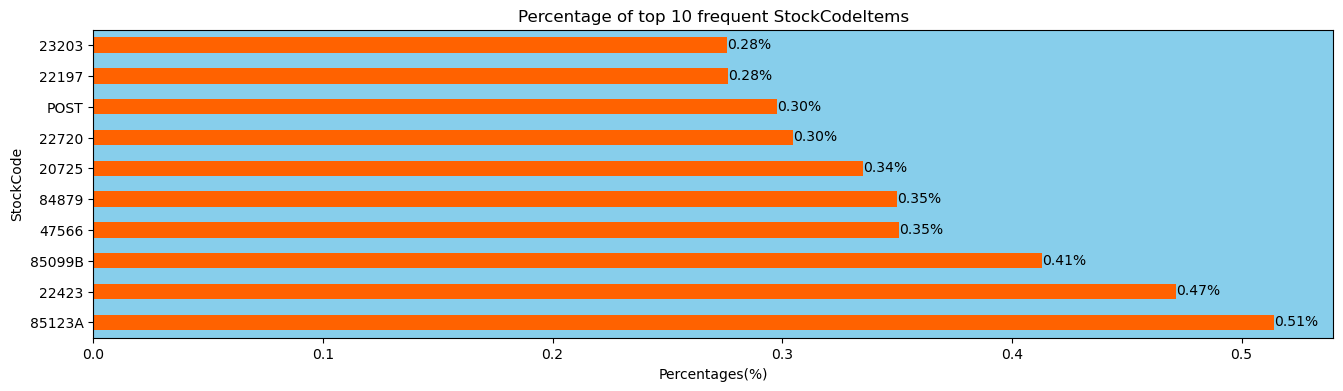

In [22]:
#Plotting Bar Graph for the percentage of top 10 frequent StockCodeItems
fig,ax=plt.subplots(figsize=(16,4))
frequency.plot(kind='barh', color='#ff6200')
for i,j in enumerate(frequency):
    plt.text(j,i+0.25,f"{j:.2f}%",ha="left",va="top")
ax.set_facecolor("skyblue")
plt.xlabel("Percentages(%)")
plt.title("Percentage of top 10 frequent StockCodeItems")
plt.show()

In [23]:
#Finding the no.of numeric characters in each StockCode
unique_stock_codes=df["StockCode"].unique()
pd.Series(unique_stock_codes).apply(lambda x:sum(c.isdigit() for c in str(x))).value_counts()

5    3676
0       7
1       1
Name: count, dtype: int64

In [24]:
#Finding the Stock Codes which are with 0 and 1 numeric characters
stock_codes_anamolous=[code for code in unique_stock_codes if 
                       sum([i.isdigit() for i in code]) in (0,1)]
print("These are the stock_code_anamolous : ")
print("-"*30)
for i in stock_codes_anamolous:
    print(i)

These are the stock_code_anamolous : 
------------------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [25]:
#Find the percentage of anamolous stock codes in the given dataset
total_noof_anamolous_codes=sum(df["StockCode"].isin(stock_codes_anamolous))
percentage_of_anamolous_codes=total_noof_anamolous_codes/len(df["StockCode"])*100
percentage_of_anamolous_codes
print(f"Total percentage of anamolous codes in the given data set is{percentage_of_anamolous_codes:.2f} %")

Total percentage of anamolous codes in the given data set is0.48 %


In [26]:
#Removing the anamolous codes from the data set
df=df[~df["StockCode"].isin(stock_codes_anamolous)]
df.shape[0]

399689

In [27]:
#Calculate the occurence of each description and sort them
noof_unique_descriptions=df["Description"].nunique()
print(f"The no.of unique descriptions in the given date set are : {noof_unique_descriptions} ")

The no.of unique descriptions in the given date set are : 3888 


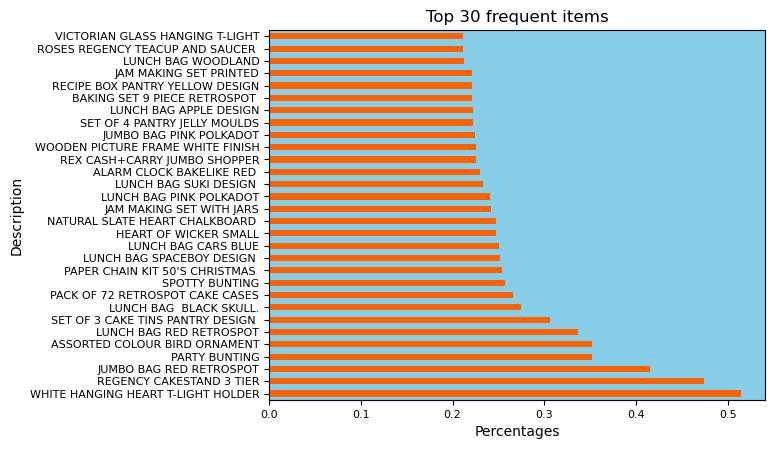

In [28]:
"""Calculate the frequency of top 30 frequencies and then 
plot the percentages of them in the whole dataset"""
frequency_of_top_30=df["Description"].value_counts().iloc[:30]
percentage_of_top_30=frequency_of_top_30/len(df["Description"])*100
percentage_of_top_30.plot(kind="barh",color="#ff6200",fontsize=8)
plt.xlabel("Percentages")
plt.title("Top 30 frequent items")
plt.gca().set_facecolor("skyblue")
plt.show()

In [29]:
#So description of the items which are not in the Capital letters
unique_description=df["Description"].unique()
anamolous_description=[c for c in unique_description if any(i.islower() for i in c)]
print("Anamolous description in the Dataset is : ")
print("-"*40)
for i in anamolous_description:
    print(i)

Anamolous description in the Dataset is : 
----------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [30]:
different_description=["Next Day Carriage","High Resolution Image"]
df=df[~df["Description"].isin(different_description)]
df["Description"]=df["Description"].str.upper()

In [31]:
df["Description"].shape[0]

399606

In [32]:
df["UnitPrice"].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [33]:
#Treating 0's unitprice
df[df["UnitPrice"]==0].describe()["Quantity"]

count       33.000000
mean       420.515152
std       2176.713608
min          1.000000
25%          2.000000
50%         11.000000
75%         36.000000
max      12540.000000
Name: Quantity, dtype: float64

In [34]:
df=df[~(df["UnitPrice"]==0)]
df.shape[0]

399573

In [35]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   
...                 ...        ...         ...             ...   
541904  12/9/2011 12:50       0.85     12680.0          France   
541905  12/9/2011 12:50       2.10     12680.0          France   
541906  12/9/2011 12:50       4.15     12680.0          France   
541907  12/9/2011 12:50       4.15     12680.0          France   
541908  12/9/2011 12:50       4.95     12680.0          France   

       Transaction_Status  
0               Completed  
1               Completed  
2               Completed  
3               Completed  
4               Completed  
...                   ...  
541904          Completed  
541905          Completed  
541906          Completed  
541907          Completed  
541908          Completed  

[399573 rows x 9 columns]

In [36]:
df.reset_index(drop=True,inplace=False)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
399568    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
399569    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
399570    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
399571    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
399572    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   
...                 ...        ...         ...             ...   
399568  12/9/2011 12:50       0.85     12680.0          France   
399569  12/9/2011 12:50       2.10     12680.0          France   
399570  12/9/2011 12:50       4.15     12680.0          France   
399571  12/9/2011 12:50       4.15     12680.0          France   
399572  12/9/2011 12:50       4.95     12680.0          France   

       Transaction_Status  
0               Completed  
1               Completed  
2               Completed  
3               Completed  
4               Completed  
...                   ...  
399568          Completed  
399569          Completed  
399570          Completed  
399571          Completed  
399572          Completed  

[399573 rows x 9 columns]

In [37]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   
...                 ...        ...         ...             ...   
541904  12/9/2011 12:50       0.85     12680.0          France   
541905  12/9/2011 12:50       2.10     12680.0          France   
541906  12/9/2011 12:50       4.15     12680.0          France   
541907  12/9/2011 12:50       4.15     12680.0          France   
541908  12/9/2011 12:50       4.95     12680.0          France   

       Transaction_Status  
0               Completed  
1               Completed  
2               Completed  
3               Completed  
4               Completed  
...                   ...  
541904          Completed  
541905          Completed  
541906          Completed  
541907          Completed  
541908          Completed  

[399573 rows x 9 columns]

In [38]:
#Recency
#Convert InvoiceData to datetime data
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
#Extract date from Datetime of InvoiceDate
df["InvoiceDay"]=df["InvoiceDate"].dt.date
#Find the most recent purchase date for each customer
customer_data=df.groupby("CustomerID")["InvoiceDay"].max().reset_index()
#Find the most recent date in entire dataset
most_recent_date=df["InvoiceDay"].max()
#Convert InvoiceDay to datetime type before subtraction
customer_data["InvoiceDay"]=pd.to_datetime(customer_data["InvoiceDay"])
most_recent_date=pd.to_datetime(most_recent_date)
#Calculate the number of days since the last purchase of each customer
customer_data["days_since_last_purchase"]=(most_recent_date-customer_data["InvoiceDay"]).dt.days
customer_data.drop(columns=["InvoiceDay"],inplace=True)
customer_data

CustomerID  days_since_last_purchase
0        12346.0                       325
1        12347.0                         2
2        12348.0                        75
3        12349.0                        18
4        12350.0                       310
...          ...                       ...
4357     18280.0                       277
4358     18281.0                       180
4359     18282.0                         7
4360     18283.0                         3
4361     18287.0                        42

[4362 rows x 2 columns]

In [39]:
#Frequency
#Find total transactions made by each customer
total_transactions=df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
total_transactions.rename(columns={"InvoiceNo":"Total_Transactions"},inplace=True)
total_transactions

CustomerID  Total_Transactions
0        12346.0                   2
1        12347.0                   7
2        12348.0                   4
3        12349.0                   1
4        12350.0                   1
...          ...                 ...
4357     18280.0                   1
4358     18281.0                   1
4359     18282.0                   3
4360     18283.0                  16
4361     18287.0                   3

[4362 rows x 2 columns]

In [40]:
#Calculate the total no.of products purchased by each customer
total_products_purchased=df.groupby("CustomerID")["Quantity"].sum().reset_index()
total_products_purchased.rename(columns={"Quantity":"Total_Products_Purchased"},inplace=True)
total_products_purchased

CustomerID  Total_Products_Purchased
0        12346.0                         0
1        12347.0                      2458
2        12348.0                      2332
3        12349.0                       630
4        12350.0                       196
...          ...                       ...
4357     18280.0                        45
4358     18281.0                        54
4359     18282.0                        98
4360     18283.0                      1355
4361     18287.0                      1586

[4362 rows x 2 columns]

In [41]:
#Merge the new Features into customer_data dataframe
customer_data=pd.merge(customer_data,total_transactions,on="CustomerID")
customer_data=pd.merge(customer_data,total_products_purchased,on="CustomerID")
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4357     18280.0                       277                   1   
4358     18281.0                       180                   1   
4359     18282.0                         7                   3   
4360     18283.0                         3                  16   
4361     18287.0                        42                   3   

      Total_Products_Purchased  
0                            0  
1                         2458  
2                         2332  
3                          630  
4                          196  
...                        ...  
4357                        45  
4358                        54  
4359                        98  
4360                      1355  
4361                      1586  

[4362 rows x 4 columns]

In [42]:
#Monetory
#Calculate the total amount spent by each customer
df["Total_Spent"]=df["Quantity"]*df["UnitPrice"]
total_amount_spent=df.groupby("CustomerID")["Total_Spent"].sum().reset_index()
total_amount_spent.rename(columns={"UnitPrice":"Total_Amount_Spent"},inplace=True)
total_amount_spent

CustomerID  Total_Spent
0        12346.0         0.00
1        12347.0      4310.00
2        12348.0      1437.24
3        12349.0      1457.55
4        12350.0       294.40
...          ...          ...
4357     18280.0       180.60
4358     18281.0        80.82
4359     18282.0       176.60
4360     18283.0      2039.58
4361     18287.0      1837.28

[4362 rows x 2 columns]

In [43]:
#Merge the new Feature into customer_data dataframe
customer_data=pd.merge(customer_data,total_amount_spent,on="CustomerID")
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4357     18280.0                       277                   1   
4358     18281.0                       180                   1   
4359     18282.0                         7                   3   
4360     18283.0                         3                  16   
4361     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  
0                            0         0.00  
1                         2458      4310.00  
2                         2332      1437.24  
3                          630      1457.55  
4                          196       294.40  
...                        ...          ...  
4357                        45       180.60  
4358                        54        80.82  
4359                        98       176.60  
4360                      1355      2039.58  
4361                      1586      1837.28  

[4362 rows x 5 columns]

In [44]:
#Calculate the average amount spent by each customer in a transaction
customer_data["Average_Amount_Spent"]=(customer_data["Total_Spent"])/(customer_data["Total_Transactions"])
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4357     18280.0                       277                   1   
4358     18281.0                       180                   1   
4359     18282.0                         7                   3   
4360     18283.0                         3                  16   
4361     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  
0                            0         0.00              0.000000  
1                         2458      4310.00            615.714286  
2                         2332      1437.24            359.310000  
3                          630      1457.55           1457.550000  
4                          196       294.40            294.400000  
...                        ...          ...                   ...  
4357                        45       180.60            180.600000  
4358                        54        80.82             80.820000  
4359                        98       176.60             58.866667  
4360                      1355      2039.58            127.473750  
4361                      1586      1837.28            612.426667  

[4362 rows x 6 columns]

In [45]:
#Product Diversity
#Calculate the unique products purchased by each customer
unique_products_purchased=df.groupby("CustomerID")["StockCode"].nunique().reset_index()
unique_products_purchased.rename(columns={"StockCode":"Unique_Products"},inplace=True)
#Merge the new Feature with customer_data dataframe
customer_data=pd.merge(customer_data,unique_products_purchased,on="CustomerID")
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4357     18280.0                       277                   1   
4358     18281.0                       180                   1   
4359     18282.0                         7                   3   
4360     18283.0                         3                  16   
4361     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4357                        45       180.60            180.600000   
4358                        54        80.82             80.820000   
4359                        98       176.60             58.866667   
4360                      1355      2039.58            127.473750   
4361                      1586      1837.28            612.426667   

      Unique_Products  
0                   1  
1                 103  
2                  21  
3                  72  
4                  16  
...               ...  
4357               10  
4358                7  
4359               12  
4360              262  
4361               59  

[4362 rows x 7 columns]

In [46]:
#Behavioral Features
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

       Transaction_Status  InvoiceDay  Total_Spent  
0               Completed  2010-12-01        15.30  
1               Completed  2010-12-01        20.34  
2               Completed  2010-12-01        22.00  
3               Completed  2010-12-01        20.34  
4               Completed  2010-12-01        20.34  
...                   ...         ...          ...  
541904          Completed  2011-12-09        10.20  
541905          Completed  2011-12-09        12.60  
541906          Completed  2011-12-09        16.60  
541907          Completed  2011-12-09        16.60  
541908          Completed  2011-12-09        14.85  

[399573 rows x 11 columns]

In [47]:
#Extract day of the week and hour from InvoiceDate
df["Day_Of_Week"]=df["InvoiceDate"].dt.dayofweek
df["Hour"]=df["InvoiceDate"].dt.hour
days_between_purchases=df.groupby("CustomerID")["InvoiceDay"].apply(lambda x:(x.diff().dropna())).apply(lambda y:y.days)
average_days_between_purchases=days_between_purchases.groupby("CustomerID").mean().reset_index()
average_days_between_purchases.rename(columns={"InvoiceDay":"Average_Days_Between_Purchases"},inplace=True)
customer_data=pd.merge(customer_data,average_days_between_purchases,on="CustomerID")
customer_data
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

  Transaction_Status  InvoiceDay  Total_Spent  Day_Of_Week  Hour  
0          Completed  2010-12-01        15.30            2     8  
1          Completed  2010-12-01        20.34            2     8  
2          Completed  2010-12-01        22.00            2     8  
3          Completed  2010-12-01        20.34            2     8  
4          Completed  2010-12-01        20.34            2     8

In [48]:
#Find the favourite shopping day in the week of the customer
favourite_shopping_day=df.groupby(["CustomerID","Day_Of_Week"]).size().reset_index(name="Count")
favourite_shopping_day=favourite_shopping_day.loc[favourite_shopping_day.groupby("CustomerID")["Count"].idxmax()][["CustomerID","Day_Of_Week"]]
favourite_shopping_day.rename(columns={"Day_Of_Week":"Favourite_Shopping_Day"},inplace=True)
#Find the favourite shopping hour of the customer
favourite_shopping_hour=df.groupby(["CustomerID","Hour"]).size().reset_index(name="Count")
favourite_shopping_hour=favourite_shopping_hour.loc[favourite_shopping_hour.groupby("CustomerID")["Count"].idxmax()][["CustomerID","Hour"]]
favourite_shopping_hour.rename(columns={"Hour":"Favourite_Shopping_Hour"},inplace=True)
#Merge favourite_shopping_day and favourite_shopping_hour into customer_data
customer_data=pd.merge(customer_data,favourite_shopping_day,on="CustomerID")
customer_data=pd.merge(customer_data,favourite_shopping_hour,on="CustomerID")
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4277                        45       180.60            180.600000   
4278                        54        80.82             80.820000   
4279                        98       176.60             58.866667   
4280                      1355      2039.58            127.473750   
4281                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4277               10                        0.000000                       0   
4278                7                        0.000000                       6   
4279               12                        9.916667                       4   
4280              262                        0.465181                       3   
4281               59                        2.304348                       2   

      Favourite_Shopping_Hour  
0                          10  
1                          14  
2                          19  
3                           9  
4                          16  
...                       ...  
4277                        9  
4278                       10  
4279                       13  
4280                       14  
4281                       10  

[4282 rows x 10 columns]

In [49]:
#Geagraphic Features
df["Country"].value_counts().head()

Country
United Kingdom    356008
Germany             9079
France              8152
EIRE                7368
Spain               2462
Name: count, dtype: int64

In [50]:
#Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country=df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')
#Get the country with maximum no.of transactions for each customer(in case customer has transactions from multiple countries)
customer_main_country=customer_country.sort_values('Number_of_Transactions',ascending=False).drop_duplicates('CustomerID')
#Creating a binary column whether a customer is from uk or not
customer_main_country['Is_UK']=customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)
#Merge Is_UK into customer_data
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4277                        45       180.60            180.600000   
4278                        54        80.82             80.820000   
4279                        98       176.60             58.866667   
4280                      1355      2039.58            127.473750   
4281                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4277               10                        0.000000                       0   
4278                7                        0.000000                       6   
4279               12                        9.916667                       4   
4280              262                        0.465181                       3   
4281               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  
0                          10      1  
1                          14      0  
2                          19      0  
3                           9      0  
4                          16      0  
...                       ...    ...  
4277                        9      1  
4278                       10      1  
4279                       13      1  
4280                       14      1  
4281                       10      1  

[4282 rows x 11 columns]

In [51]:
customer_data["Is_UK"].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

In [52]:
#CancellationInsights
#CancellationFrequency
cancellation_df=df[df["Transaction_Status"]=="Cancelled"]
cancellation_frequency=cancellation_df.groupby("CustomerID")["Transaction_Status"].nunique().reset_index()
cancellation_frequency.rename(columns={"Transaction_Status":"Cancellation_Frequency"},inplace=True)
#Merge cancellation_frequency into customer_data
customer_data=pd.merge(customer_data,cancellation_frequency,on="CustomerID",how="left")
#Replace NaN values with 0
customer_data["Cancellation_Frequency"].fillna(0,inplace=True)
#CancellationRate
customer_data["Cancellation_Rate"]=customer_data["Cancellation_Frequency"]/customer_data["Total_Transactions"]
customer_data


CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4277                        45       180.60            180.600000   
4278                        54        80.82             80.820000   
4279                        98       176.60             58.866667   
4280                      1355      2039.58            127.473750   
4281                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4277               10                        0.000000                       0   
4278                7                        0.000000                       6   
4279               12                        9.916667                       4   
4280              262                        0.465181                       3   
4281               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4277                        9      1                     0.0   
4278                       10      1                     0.0   
4279                       13      1                     1.0   
4280                       14      1                     0.0   
4281                       10      1                     0.0   

      Cancellation_Rate  
0              0.500000  
1              0.000000  
2              0.000000  
3              0.000000  
4              0.000000  
...                 ...  
4277           0.000000  
4278           0.000000  
4279           0.333333  
4280           0.000000  
4281           0.000000  

[4282 rows x 13 columns]

In [53]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

       Transaction_Status  InvoiceDay  Total_Spent  Day_Of_Week  Hour  
0               Completed  2010-12-01        15.30            2     8  
1               Completed  2010-12-01        20.34            2     8  
2               Completed  2010-12-01        22.00            2     8  
3               Completed  2010-12-01        20.34            2     8  
4               Completed  2010-12-01        20.34            2     8  
...                   ...         ...          ...          ...   ...  
541904          Completed  2011-12-09        10.20            4    12  
541905          Completed  2011-12-09        12.60            4    12  
541906          Completed  2011-12-09        16.60            4    12  
541907          Completed  2011-12-09        16.60            4    12  
541908          Completed  2011-12-09        14.85            4    12  

[399573 rows x 13 columns]

In [54]:
#Extract month and year from Invoice Date
df["Year"]=df["InvoiceDate"].dt.year
df["Month"]=df["InvoiceDate"].dt.month
#Calculate monthly spending for each customer
monthly_spending=df.groupby(["CustomerID","Year","Month"])["Total_Spent"].sum().reset_index()
#Calculate Seasonal Buying Patterns:We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns=monthly_spending.groupby("CustomerID")["Total_Spent"].agg(["mean","std"]).reset_index()
seasonal_buying_patterns.rename(columns={"mean":"Monthly_Spending_Mean","std":"Monthly_Spending_Std"},inplace=True)
seasonal_buying_patterns["Monthly_Spending_Std"].fillna(0,inplace=True)
customer_data=pd.merge(customer_data,seasonal_buying_patterns,on="CustomerID")
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4277                        45       180.60            180.600000   
4278                        54        80.82             80.820000   
4279                        98       176.60             58.866667   
4280                      1355      2039.58            127.473750   
4281                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4277               10                        0.000000                       0   
4278                7                        0.000000                       6   
4279               12                        9.916667                       4   
4280              262                        0.465181                       3   
4281               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4277                        9      1                     0.0   
4278                       10      1                     0.0   
4279                       13      1                     1.0   
4280                       14      1                     0.0   
4281                       10      1                     0.0   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  
0              0.500000               0.000000              0.000000  
1              0.000000             615.714286            341.070789  
2              0.000000             359.310000            203.875689  
3              0.000000            1457.550000              0.000000  
4              0.000000             294.400000              0.000000  
...                 ...                    ...                   ...  
4277           0.000000             180.600000              0.000000  
4278           0.000000              80.820000              0.000000  
427

In [55]:
from scipy.stats import linregress
#Calculate trends in Spending
#We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    #If there are more than one data points,we calculate the trend using linear regression
    if len(spend_data)>1:
        x=np.arange(len(spend_data))
        slope,_,_,_,_=linregress(x,spend_data)
        return slope
    else:
        #If there is only one data point no trend can be calculated,hence we return 0
        return 0
#Apply the calculate trend function to calculate the spending trend of each customer
spending_trends=monthly_spending.groupby("CustomerID")["Total_Spent"].apply(calculate_trend).reset_index()
#Rename the Total_Spent in spending_trends to Spending_Trend
spending_trends.rename(columns={"Total_Spent":"Spending_Trend"},inplace=True)
customer_data=pd.merge(customer_data,spending_trends,on="CustomerID")
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4277                        45       180.60            180.600000   
4278                        54        80.82             80.820000   
4279                        98       176.60             58.866667   
4280                      1355      2039.58            127.473750   
4281                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4277               10                        0.000000                       0   
4278                7                        0.000000                       6   
4279               12                        9.916667                       4   
4280              262                        0.465181                       3   
4281               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4277                        9      1                     0.0   
4278                       10      1                     0.0   
4279                       13      1                     1.0   
4280                       14      1                     0.0   
4281                       10      1                     0.0   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0              0.500000               0.000000              0.000000   
1              0.000000             615.714286            341.070789   
2              0.000000             359.310000            203.875689   
3              0.000000            1457.550000              0.000000   
4              0.000000             294.400000              0.000000   
...                 ...                    ...                   ...   
4277           0.000000             180.600000              0.000000   
4278           0.000000              80.820000              0.0000

In [56]:
customer_data.info()
customer_data.iloc[:,1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   float64
 1   days_since_last_purchase        4282 non-null   int64  
 2   Total_Transactions              4282 non-null   int64  
 3   Total_Products_Purchased        4282 non-null   int64  
 4   Total_Spent                     4282 non-null   float64
 5   Average_Amount_Spent            4282 non-null   float64
 6   Unique_Products                 4282 non-null   int64  
 7   Average_Days_Between_Purchases  4282 non-null   float64
 8   Favourite_Shopping_Day          4282 non-null   int32  
 9   Favourite_Shopping_Hour         4282 non-null   int32  
 10  Is_UK                           4282 non-null   int64  
 11  Cancellation_Frequency          4282 non-null   float64
 12  Cancellation_Rate               42

days_since_last_purchase  Total_Transactions  Total_Products_Purchased  \
0                          325                   2                         0   
1                            2                   7                      2458   
2                           75                   4                      2332   
3                           18                   1                       630   
4                          310                   1                       196   
...                        ...                 ...                       ...   
4277                       277                   1                        45   
4278                       180                   1                        54   
4279                         7                   3                        98   
4280                         3                  16                      1355   
4281                        42                   3                      1586   

      Total_Spent  Average_Amount_Spent  Unique_Products  \
0            0.00              0.000000                1   
1         4310.00            615.714286              103   
2         1437.24            359.310000               21   
3         1457.55           1457.550000               72   
4          294.40            294.400000               16   
...           ...                   ...              ...   
4277       180.60            180.600000               10   
4278        80.82             80.820000                7   
4279       176.60             58.866667               12   
4280      2039.58            127.473750              262   
4281      1837.28            612.426667               59   

      Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                           0.000000                       1   
1                           2.016575                       1   
2                          10.884615                       3   
3                           0.000000                       0   
4                           0.000000                       2   
...                              ...                     ...   
4277                        0.000000                       0   
4278                        0.000000                       6   
4279                        9.916667                       4   
4280                        0.465181                       3   
4281                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4277                        9      1                     0.0   
4278                       10      1                     0.0   
4279                       13      1                     1.0   
4280                       14      1                     0.0   
4281                       10      1                     0.0   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0              0.500000               0.000000              0.000000   
1              0.000000             615.714286            341.070789   
2              0.000000             359.310000            203.875689   
3              0.000000            1457.550000              0.000000   
4              0.000000             294.400000              0.000000   
...                 ...                    ...                   ...   
4277           0.000000             180.600000              0.000000   
4278           0.000000              80.820000              0.000000   
4279           0.333333              88.300000             14.792674   
4280           0.000000             203.958000            165.7987

In [57]:
#Outlier Detection and Treatment
#Initializing the IsolationForest Model with a contamination parameter of 0.05
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination=0.05,random_state=0)
#Fitting the model into the dataset(converting DataFrame to numpy to avoid Warning)
customer_data["Outlier_Scores"]=model.fit_predict(customer_data.iloc[:,1:].to_numpy())
customer_data["Is_Outlier"]=[1 if x==-1 else 0 for x in customer_data["Outlier_Scores"]]
customer_data

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4277                        45       180.60            180.600000   
4278                        54        80.82             80.820000   
4279                        98       176.60             58.866667   
4280                      1355      2039.58            127.473750   
4281                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4277               10                        0.000000                       0   
4278                7                        0.000000                       6   
4279               12                        9.916667                       4   
4280              262                        0.465181                       3   
4281               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4277                        9      1                     0.0   
4278                       10      1                     0.0   
4279                       13      1                     1.0   
4280                       14      1                     0.0   
4281                       10      1                     0.0   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0              0.500000               0.000000              0.000000   
1              0.000000             615.714286            341.070789   
2              0.000000             359.310000            203.875689   
3              0.000000            1457.550000              0.000000   
4              0.000000             294.400000              0.000000   
...                 ...                    ...                   ...   
4277           0.000000             180.600000              0.000000   
4278           0.000000              80.820000              0.0000

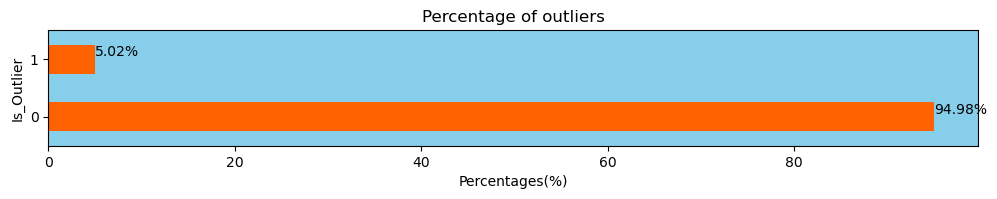

In [58]:
#Find the percentage of inliers and outliers
outlier_percentage=customer_data["Is_Outlier"].value_counts(normalize=True)*100
#Plotting the percentages of inliers and outliers
plt.figure(figsize=(12,1.5))
outlier_percentage.plot(kind='barh', color='#ff6200')
for i,j in enumerate(outlier_percentage):
    plt.text(j,i+0.25,f"{j:.2f}%",ha="left",va="top")
plt.gca().set_facecolor("skyblue")
plt.xlabel("Percentages(%)")
plt.title("Percentage of outliers")
plt.show()

In [59]:
#Seperate the outliers data into a seperate data
outliers_data=customer_data[customer_data["Is_Outlier"]==1]
#Remove the outliers from customer_data set
customer_data=customer_data[customer_data["Is_Outlier"]==0]
#Drop Outlier_Scores and Is_Outlier from the customer_data
customer_data_cleaned=customer_data.drop(columns=["Outlier_Scores","Is_Outlier"]).reset_index(drop=True)
customer_data_cleaned

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4062     18280.0                       277                   1   
4063     18281.0                       180                   1   
4064     18282.0                         7                   3   
4065     18283.0                         3                  16   
4066     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4062                        45       180.60            180.600000   
4063                        54        80.82             80.820000   
4064                        98       176.60             58.866667   
4065                      1355      2039.58            127.473750   
4066                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4062               10                        0.000000                       0   
4063                7                        0.000000                       6   
4064               12                        9.916667                       4   
4065              262                        0.465181                       3   
4066               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4062                        9      1                     0.0   
4063                       10      1                     0.0   
4064                       13      1                     1.0   
4065                       14      1                     0.0   
4066                       10      1                     0.0   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0              0.500000               0.000000              0.000000   
1              0.000000             615.714286            341.070789   
2              0.000000             359.310000            203.875689   
3              0.000000            1457.550000              0.000000   
4              0.000000             294.400000              0.000000   
...                 ...                    ...                   ...   
4062           0.000000             180.600000              0.000000   
4063           0.000000              80.820000              0.0000

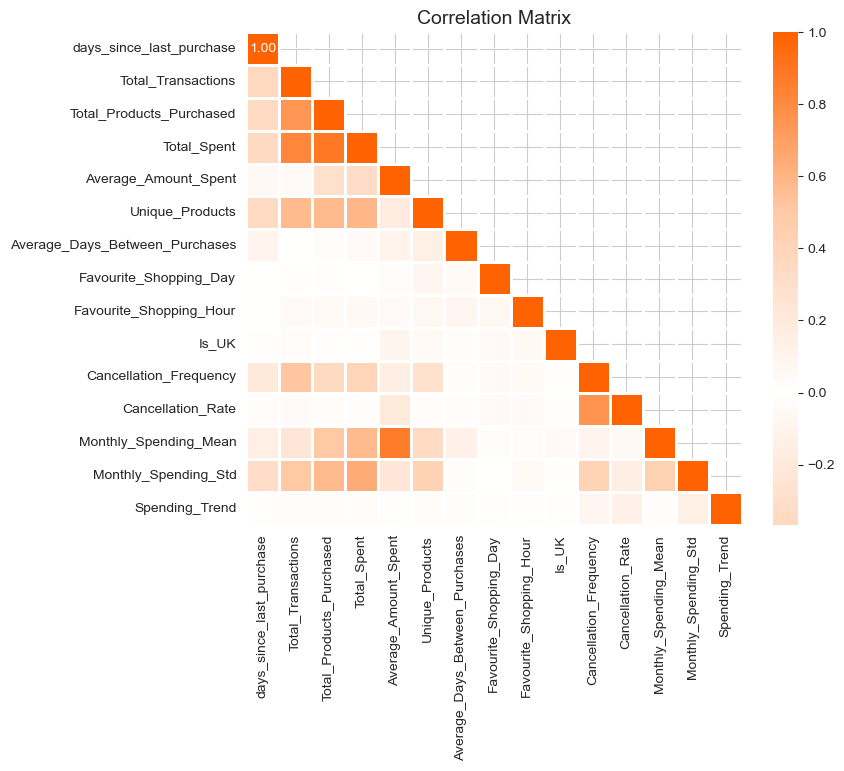

In [60]:
#CorrelationAnalysis
#Create White Grid
sns.set_style("whitegrid")
#Calculate the corelation matrix excluding the "CustomerID" column
corr=customer_data_cleaned.drop(columns=["CustomerID"]).corr()
#Define the custom colormap
colors=["#ff6200",'#ffcaa8', 'white', '#ffcaa8', '#ff6200']
from matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list("custom_map",colors,N=256)
#Create a mask to only show the lower triangular matrix(since it is a mirror image around its)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)]=True
#Plot the heatmap
plt.figure(figsize=(8,6.4))
sns.heatmap(corr,mask=mask,cmap=my_cmap,annot=True,center=0,fmt=".2f",linewidths=2)
plt.title("Correlation Matrix",fontsize=14)
plt.show()


In [61]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#List of the columns not to be included
columns_to_be_excluded=["CustomerID","Is_UK","Favourite_Shopping_Day","index"]
#List of Colums that need to be scaled
columns_to_scale=customer_data_cleaned.columns.difference(columns_to_be_excluded)
#Copy the cleaned Dataset
customer_data_scaled=customer_data_cleaned.copy()
#Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale]=scaler.fit_transform(customer_data_scaled[columns_to_scale])
customer_data_scaled

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                  2.371144           -0.474746   
1        12347.0                 -0.896667            0.571753   
2        12348.0                 -0.158122           -0.056146   
3        12349.0                 -0.734794           -0.684045   
4        12350.0                  2.219388           -0.684045   
...          ...                       ...                 ...   
4062     18280.0                  1.885525           -0.684045   
4063     18281.0                  0.904170           -0.684045   
4064     18282.0                 -0.846082           -0.265446   
4065     18283.0                 -0.886550            2.455451   
4066     18287.0                 -0.491985           -0.265446   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                    -0.744447    -0.777396             -1.384988   
1                     1.878788     2.115938              1.647744   
2                     1.744318     0.187434              0.384812   
3                    -0.072096     0.201068              5.794248   
4                    -0.535271    -0.579763              0.065094   
...                        ...          ...                   ...   
4062                 -0.696422    -0.656158             -0.495433   
4063                 -0.686817    -0.723141             -0.986905   
4064                 -0.639859    -0.658843             -1.095037   
4065                  0.701641     0.591789             -0.757109   
4066                  0.948169     0.455983              1.631551   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0           -0.891338                       -0.356684                       1   
1            0.750284                       -0.131058                       1   
2           -0.569451                        0.861147                       3   
3            0.251360                       -0.356684                       0   
4           -0.649923                       -0.356684                       2   
...               ...                             ...                     ...   
4062        -0.746489                       -0.356684                       0   
4063        -0.794772                       -0.356684                       6   
4064        -0.714300                        0.752848                       4   
4065         3.309283                       -0.304637                       3   
4066         0.042133                       -0.098861                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                   -1.088188      1                1.403073   
1                    0.649239      0               -0.712721   
2                    2.821023      0               -0.712721   
3                   -1.522545      0               -0.712721   
4                    1.517952      0               -0.712721   
...                       ...    ...                     ...   
4062                -1.522545      1               -0.712721   
4063                -1.088188      1               -0.712721   
4064                 0.214882      1                1.403073   
4065                 0.649239      1               -0.712721   
4066                -1.088188      1               -0.712721   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0              3.221994              -1.402329             -0.720815   
1             -0.538450               1.053205              1.259719   
2             -0.538450               0.030638              0.463053   
3             -0.538450               4.410535             -0.720815   
4             -0.538450              -0.228230             -0.720815   
...                 ...                    ...                   ...   
4062          -0.538450              -0.682077             -0.720815   
4063          -0.538450              -1.080010             -0.7208

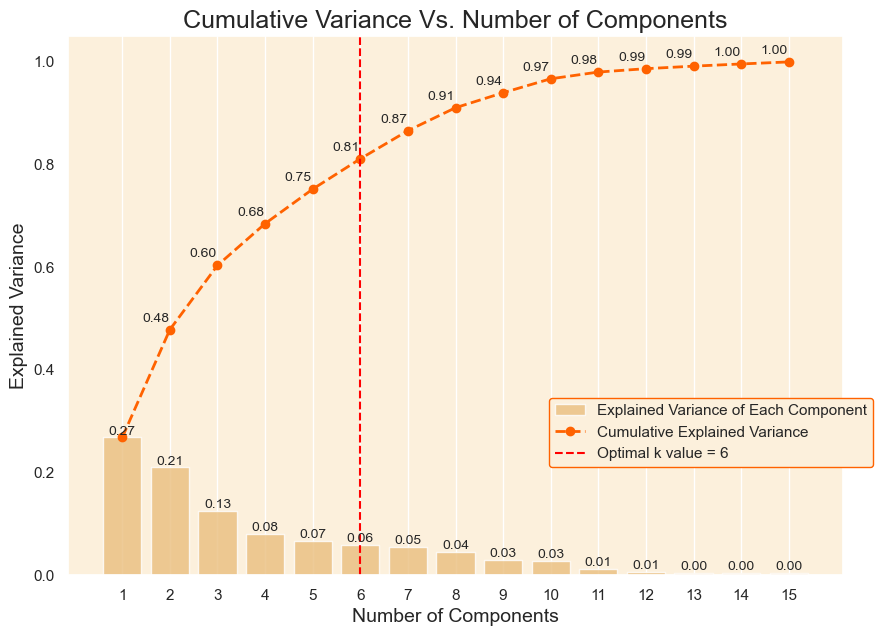

In [62]:
#Dimensionality Reduction
#Setting CustomerID as the index column
from sklearn.decomposition import PCA
customer_data_scaled.set_index("CustomerID",inplace=True)
#Apply PCA
pca=PCA().fit(customer_data_scaled)
#Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(explained_variance_ratio)
#Set the optimal k value(based on our analysis,we can choose 6)
optimal_k=6
#Set Seaborn plot style
sns.set(rc={"axes.facecolor":"#fcf0dc"},style="darkgrid")
#Plot the cumulative explained variance against the no.of components
plt.figure(figsize=(10,7))
#Bar chart for the explained variance of each component
barplot=sns.barplot(x=list(range(1,len(cumulative_explained_variance)+1)),y=explained_variance_ratio,color="#fcc36d",alpha=0.8)
#Line Plot for the cumulative explained Variance
lineplot,=plt.plot(range(0,len(cumulative_explained_variance)),cumulative_explained_variance,marker="o",linestyle="--",color="#ff6200",linewidth=2)
#Plot optimal k value line
optimal_k_line=plt.axvline(optimal_k-1,color="red",linestyle="--",label=f"Optimal k value = {optimal_k}")
#set labels and title
plt.xlabel("Number of Components",fontsize=14)
plt.ylabel("Explained Variance",fontsize=14)
plt.title("Cumulative Variance Vs. Number of Components",fontsize=18)

#Customize ticks and legend
plt.xticks(range(0,len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0],lineplot, optimal_k_line],labels=
        ['Explained Variance of Each Component', 'Cumulative Explained Variance',f"Optimal k value = {optimal_k}"],
           loc=(0.62, 0.2),frameon=True,framealpha=1.0,  edgecolor='#ff6200')
#Display the variance rules for both graphs on the plots
x_offset=-0.3
y_offset=0.01
for i,(ev_ratio,cum_ev_ratio) in enumerate(zip(explained_variance_ratio,cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
plt.grid(axis='both')   
plt.show()


In [63]:
#Creating a PCA object with 6 components
pca=PCA(n_components=6)
#Fitting and transforming the original data to the new PCA dataframe
customer_data_pca=pca.fit_transform(customer_data_scaled)
customer_data_pca=pd.DataFrame(customer_data_pca,columns=["PC"+str(i+1) for i in range(pca.n_components_)])
customer_data_pca.index=customer_data_scaled.index
customer_data_pca

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346.0    -2.061059  1.789632 -3.309594 -1.987881 -0.380436 -1.977625
12347.0     3.232201  1.488895  1.940739  0.426827 -0.212927  0.563307
12348.0     0.593882 -0.571212  0.780029  0.593656 -0.781760  1.999711
12349.0     1.994591  2.733898  5.623730 -3.181078  1.419223 -0.854718
12350.0    -2.006587  0.429607  0.943748 -0.330629 -1.448269 -0.049521
...              ...       ...       ...       ...       ...       ...
18280.0    -2.250507  2.578235  0.425067 -0.098835  0.322313 -1.129971
18281.0    -2.244057 -3.425587 -0.241604  0.213471  0.609821 -0.784675
18282.0    -1.021151 -1.285535 -2.850714 -0.462773  0.374620  0.063506
18283.0     2.372684 -0.750615 -0.356136  2.637248 -1.359157  0.556826
18287.0     1.588181  0.636346  2.590613 -0.105458  0.946721 -1.811955

[4067 rows x 6 columns]

In [64]:
#Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3=column.abs().nlargest(3).index
    return ["background-color: #ffeacc" if i in top3 else "" for i in column.index]
#Create a PCA component DataFrame and apply the highlighting function
pc_df=pd.DataFrame(pca.components_.T,columns=["PC"+str(i+1) for i in range(pca.n_components_)],
                  index=customer_data_scaled.columns)
pc_df.style.apply(highlight_top3,axis=0)


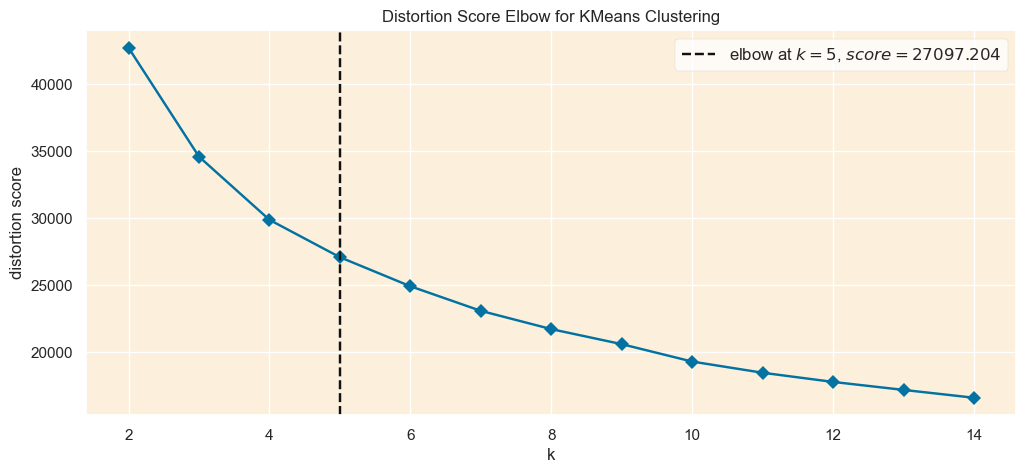

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
#Determining the optimal no.of Clusters
#Elbow method
sns.set(style="darkgrid",rc={"axes.facecolor":"#fcf0dc"})
#Set the color palette for the plot
sns.set_palette(["#ff6200"])
#Instantiate the clustering model with the specified parameters
from sklearn.cluster import KMeans
km=KMeans(init="k-means++",n_init=10,max_iter=100,random_state=0)
#Create a axis and figure with the desired size
fig,ax=plt.subplots(figsize=(12,5))
#Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
visualizer=KElbowVisualizer(km,k=(2,15),timings=False,ax=ax)
#Fit the data to the visualizer
visualizer.fit(customer_data_pca)
#Finalize the render the figure
visualizer.show()

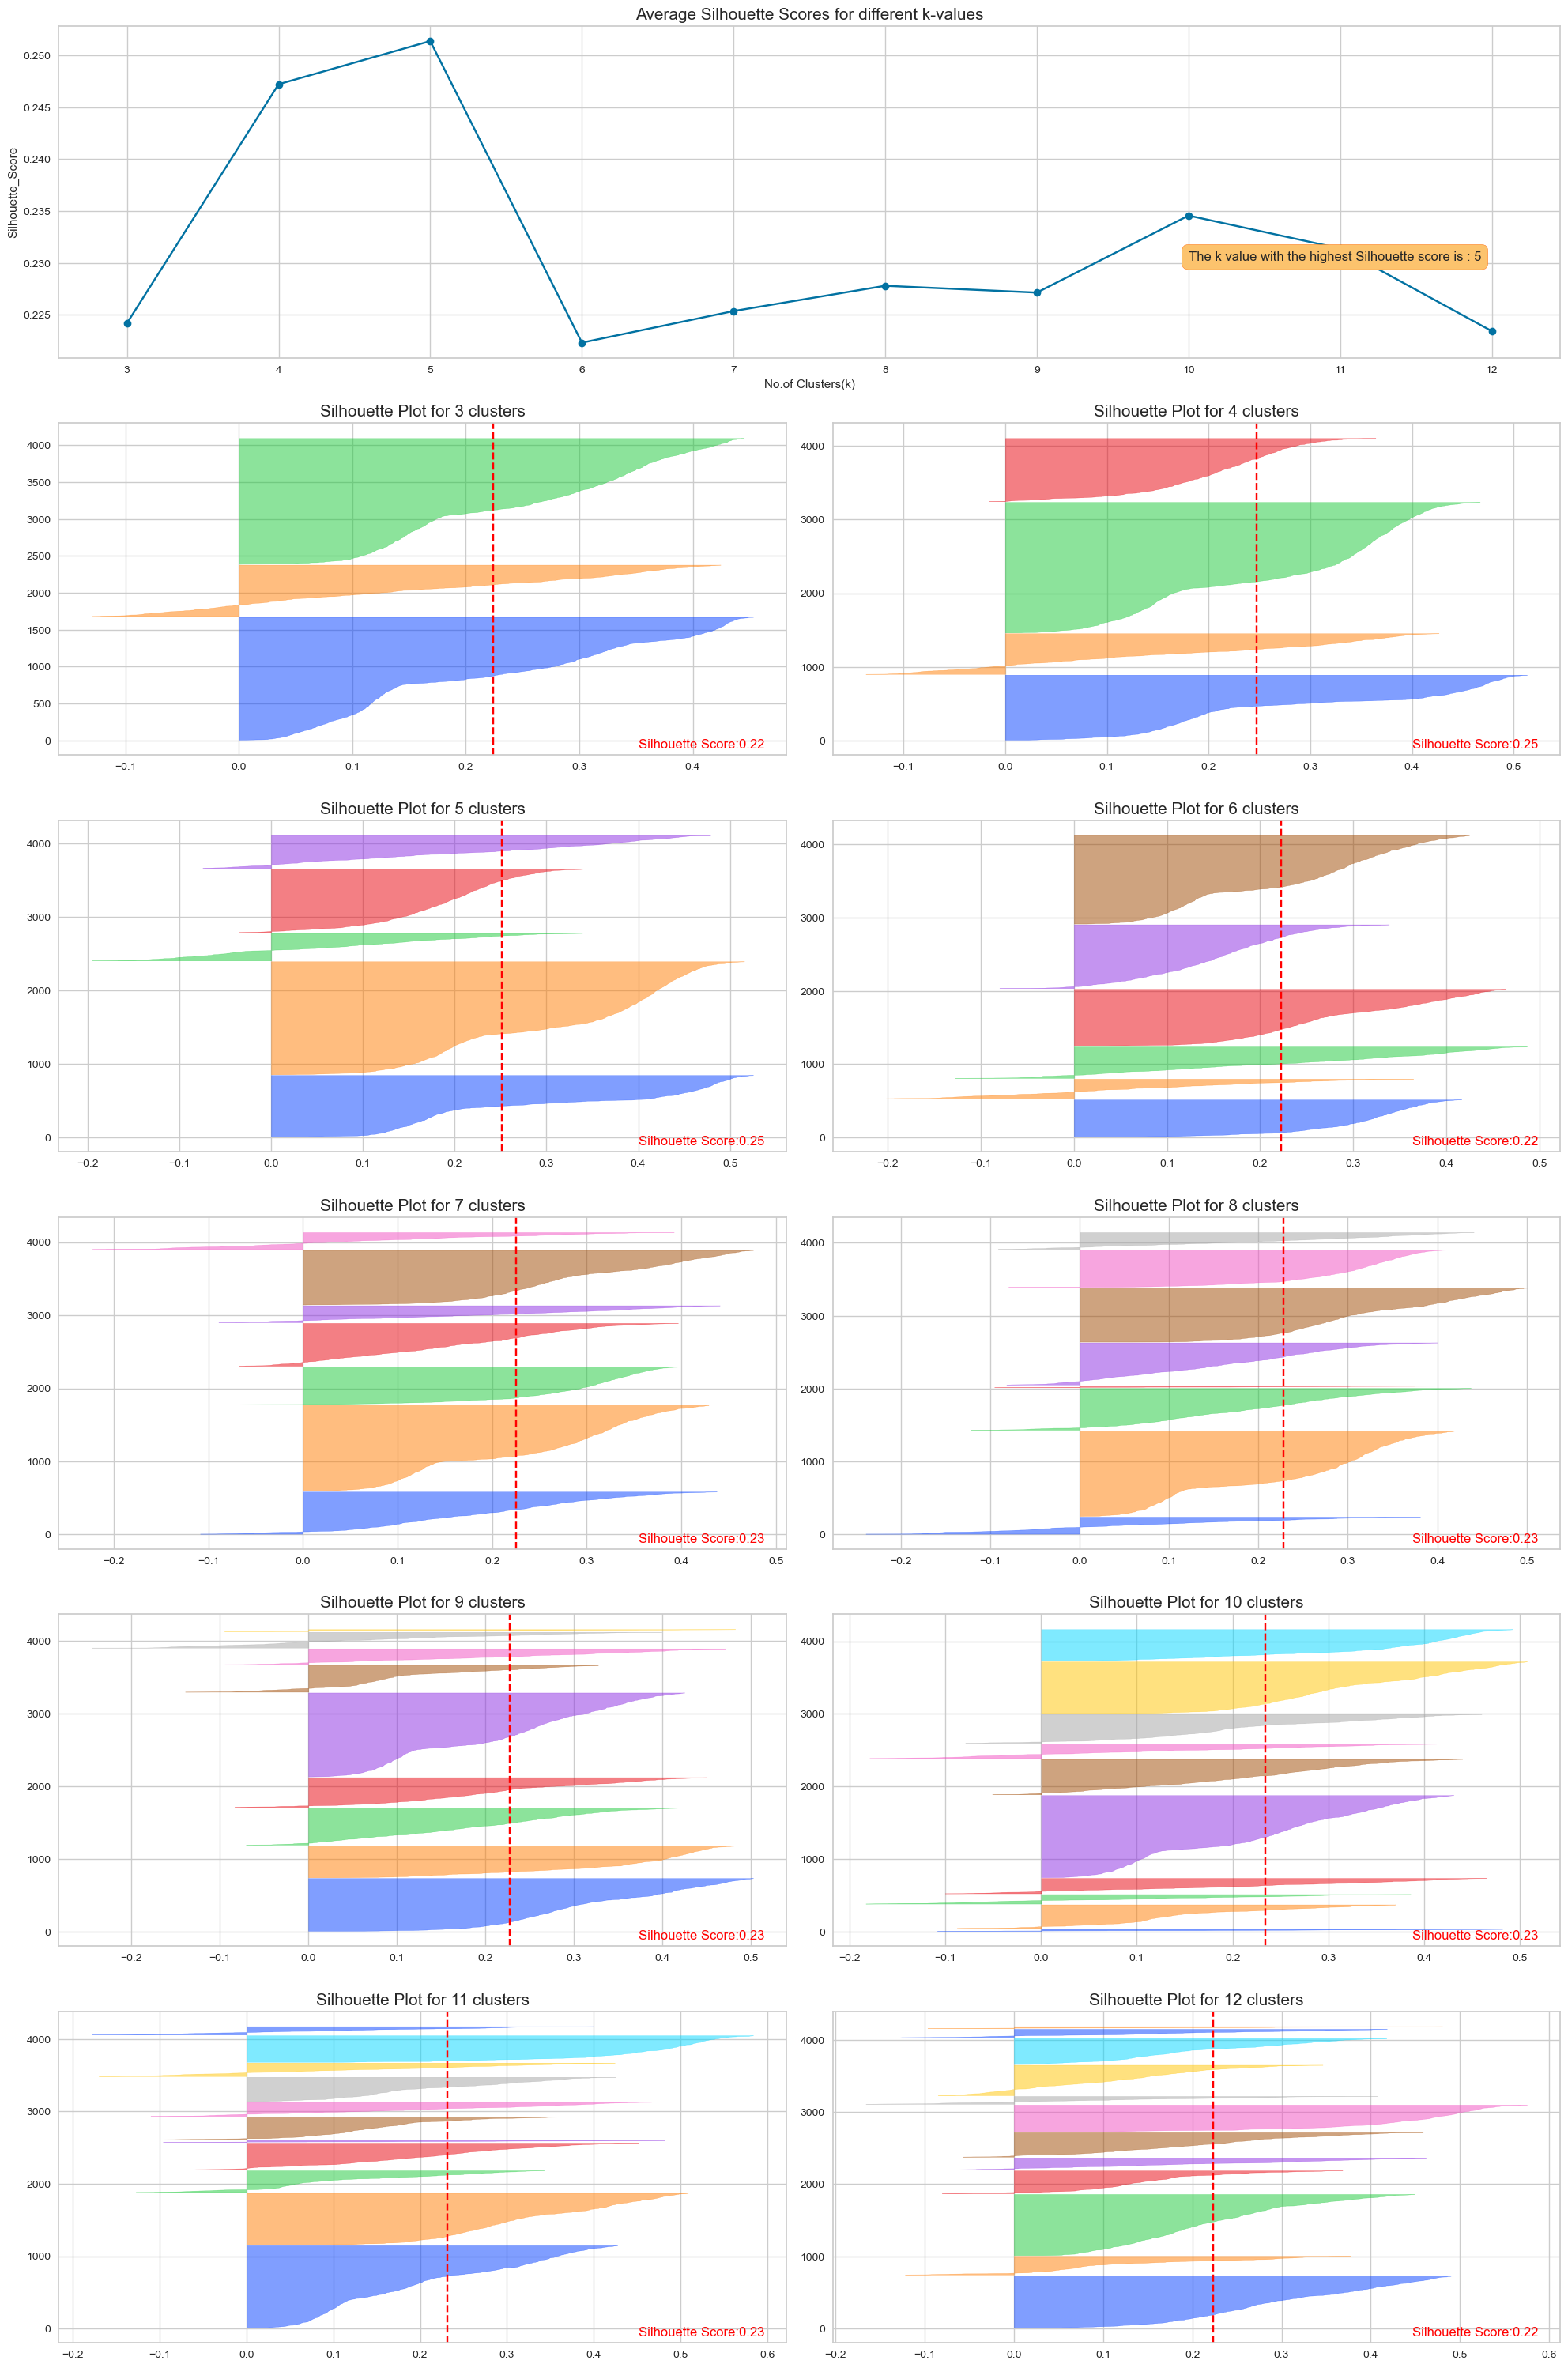

In [66]:
#Silhouette Method
def silhouette_analysis(df,start_k,stop_k,figsize=(15,16)):
    """Perfoem Silhoutte analysis for a range of k values and visualize the results"""
    #Set the size of the figure
    plt.figure(figsize=figsize)
    #Create a grid with (stop_k-start_k+1) rows and 2 columns
    import matplotlib.gridspec as gridspec
    grid=gridspec.GridSpec(stop_k-start_k+1,2)
    #Assign the first plot to the first row and both columns
    first_plot=plt.subplot(grid[0,:])
    #First plot:Silhouette scores for different k values
    sns.set_palette(["darkorange"])
    silhouette_scores=[]
    #Iterate throught the range of k values
    for k in range(start_k,stop_k+1):
        km=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=100,random_state=0)
        km.fit(df)
        labels=km.predict(df)
        from sklearn.metrics import silhouette_score
        score=silhouette_score(df,labels)
        silhouette_scores.append(score)
    best_k=start_k+silhouette_scores.index(max(silhouette_scores))
    plt.plot(range(start_k,stop_k+1),silhouette_scores,marker="o")
    plt.xticks(range(start_k,stop_k+1))
    plt.xlabel("No.of Clusters(k)")
    plt.ylabel("Silhouette_Score")
    plt.title("Average Silhouette Scores for different k-values",fontsize=15)
    #Add the optional k value text to the plot
    optimal_k_text=f'The k value with the highest Silhouette score is : {best_k}'
    plt.text(10,0.23,optimal_k_text,fontsize=12,verticalalignment="bottom",horizontalalignment="left",
             bbox=dict(facecolor="#fcc36d",edgecolor="#ff6200",boxstyle="round,pad=0.5"))
    #Second plot (subplot):Silhouette plots for each k value
    colors=sns.color_palette("bright")
    for i in range(start_k,stop_k+1):
        km=KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=100,random_state=0)
        row_idx,col_idx=divmod(i-start_k,2)
        #Assign the plots to the second,third, and fourth rows
        ax=plt.subplot(grid[row_idx+1,col_idx])
        visualizer=SilhouetteVisualizer(km,colors=colors,ax=ax)
        visualizer.fit(df)
        #Add the silhouette score text to the plot
        score=silhouette_score(df,km.labels_)
        ax.text(0.97,0.02,f'Silhouette Score:{score:.2f}',fontsize=12,ha="right",transform=ax.transAxes,color="red")
        ax.set_title(f'Silhouette Plot for {i} clusters',fontsize=15)
    plt.tight_layout()
    plt.show()
silhouette_analysis(customer_data_pca,3,12,figsize=(20,50))


In [67]:
#Clustering-model-K-Means
#Apply K-Means clustering with the optimal k
kmeans=KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=100,random_state=0)
kmeans.fit(customer_data_pca)
#Get the frequency of each cluster
from collections import Counter
cluster_frequencies=Counter(kmeans.labels_)
#Create a mapping from old labels to new labels based on frequency
label_mapping={label:new_label for new_label,(label,_) in enumerate(cluster_frequencies.most_common())}
#Reverse the mapping to assign labels as per your criteria
label_mapping={v:k for k,v in {2:1,1:0,0:2}.items()}
#Apply the mapping to get the new labels
new_labels=np.array([label_mapping[label] for label in kmeans.labels_])
#Append the new cluster labels back to the original dataset
customer_data_cleaned["clusters"]=new_labels
#Append the new cluster labels to the PCA version of the dataset
customer_data_pca["clusters"]=new_labels
customer_data_cleaned


CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4062     18280.0                       277                   1   
4063     18281.0                       180                   1   
4064     18282.0                         7                   3   
4065     18283.0                         3                  16   
4066     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                         2458      4310.00            615.714286   
2                         2332      1437.24            359.310000   
3                          630      1457.55           1457.550000   
4                          196       294.40            294.400000   
...                        ...          ...                   ...   
4062                        45       180.60            180.600000   
4063                        54        80.82             80.820000   
4064                        98       176.60             58.866667   
4065                      1355      2039.58            127.473750   
4066                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                 103                        2.016575                       1   
2                  21                       10.884615                       3   
3                  72                        0.000000                       0   
4                  16                        0.000000                       2   
...               ...                             ...                     ...   
4062               10                        0.000000                       0   
4063                7                        0.000000                       6   
4064               12                        9.916667                       4   
4065              262                        0.465181                       3   
4066               59                        2.304348                       2   

      Favourite_Shopping_Hour  Is_UK  Cancellation_Frequency  \
0                          10      1                     1.0   
1                          14      0                     0.0   
2                          19      0                     0.0   
3                           9      0                     0.0   
4                          16      0                     0.0   
...                       ...    ...                     ...   
4062                        9      1                     0.0   
4063                       10      1                     0.0   
4064                       13      1                     1.0   
4065                       14      1                     0.0   
4066                       10      1                     0.0   

      Cancellation_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0              0.500000               0.000000              0.000000   
1              0.000000             615.714286            341.070789   
2              0.000000             359.310000            203.875689   
3              0.000000            1457.550000              0.000000   
4              0.000000             294.400000              0.000000   
...                 ...                    ...                   ...   
4062           0.000000             180.600000              0.000000   
4063           0.000000              80.820000              0.0000

In [68]:
#3D Visualization of top Principal components
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

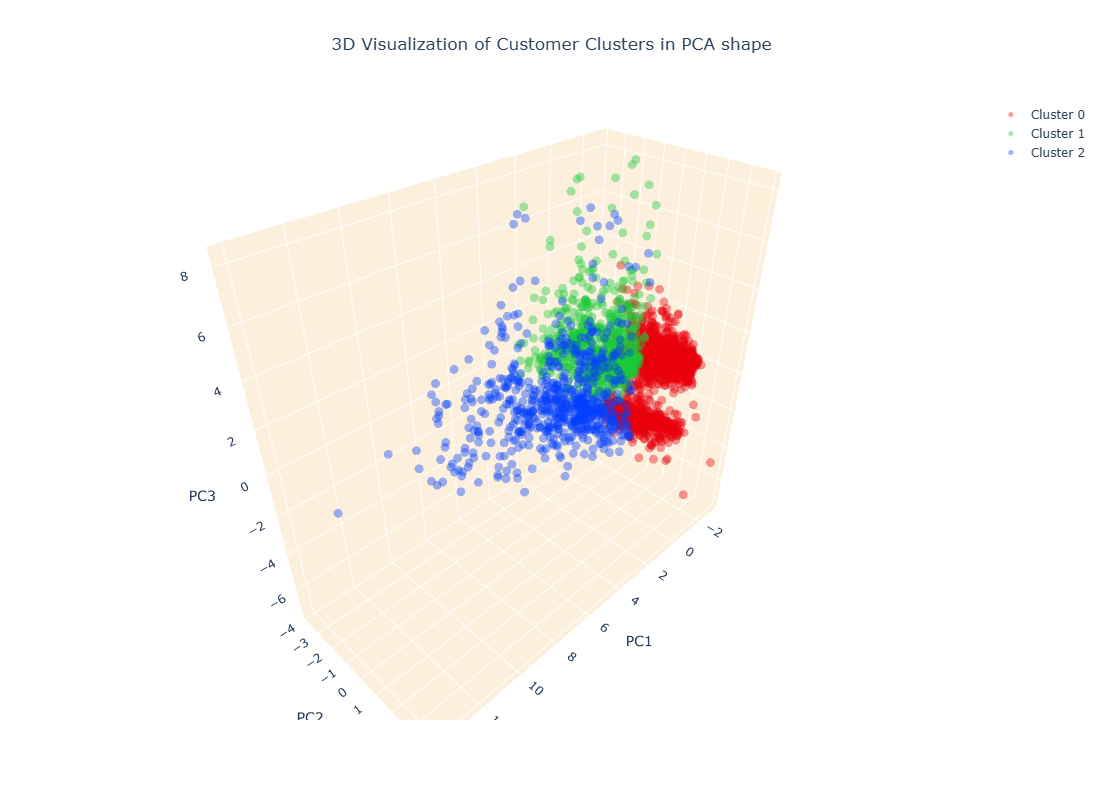

In [69]:
#Create a seperate dataframe for each cluster
cluster_0=customer_data_pca[customer_data_pca["clusters"]==0]
cluster_1=customer_data_pca[customer_data_pca["clusters"]==1]
cluster_2=customer_data_pca[customer_data_pca["clusters"]==2]
#Create a 3D scatter plot
import plotly.graph_objects as go
fig=go.Figure()
#Add data points for each cluster seperately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0["PC1"],y=cluster_0["PC2"],z=cluster_0["PC3"],mode="markers",
                           marker=dict(color=colors[0],size=5,opacity=0.4),name="Cluster 0"))
fig.add_trace(go.Scatter3d(x=cluster_1["PC1"],y=cluster_1["PC2"],z=cluster_2["PC3"],mode="markers",
                           marker=dict(color=colors[1],size=5,opacity=0.4),name="Cluster 1"))
fig.add_trace(go.Scatter3d(x=cluster_2["PC1"],y=cluster_2["PC2"],z=cluster_2["PC3"],mode="markers",
                           marker=dict(color=colors[2],size=5,opacity=0.4),name="Cluster 2"))
#Set the title and the layout details
fig.update_layout(title=dict(text="3D Visualization of Customer Clusters in PCA shape",x=0.5),
                  scene=dict(xaxis=dict(backgroundcolor="#fcf0dc",gridcolor="white",title="PC1"),
                             yaxis=dict(backgroundcolor="#fcf0dc",gridcolor="white",title="PC2"),
                             zaxis=dict(backgroundcolor="#fcf0dc",gridcolor="white",title="PC3"))
                            ,height=800,width=900)
fig.show()

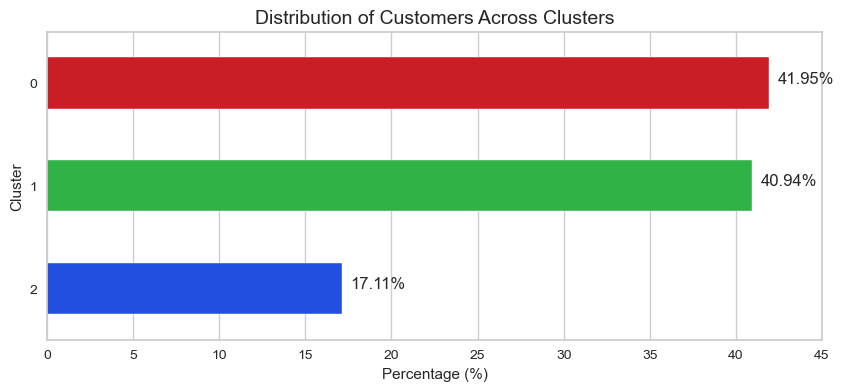

In [70]:
#Calculate the percentage of each customers in each cluster
cluster_percentage=(customer_data_pca["clusters"].value_counts(normalize=True)*100).reset_index()
cluster_percentage.columns=["Cluster","Percentage"]
cluster_percentage.sort_values(by="Cluster",inplace=True)
#Create a horizontal bar plot
plt.figure(figsize=(10,4))
sns.barplot(x="Percentage",y="Cluster",data=cluster_percentage,orient="h",palette=colors,width=0.5)
#Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5,index,f'{value:.2f}%')
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

plt.show()


In [71]:
#Evaluation Metrics
#Compute no.of customers
num_observations=len(customer_data_pca)
#Seperate the features and the cluster labels
X=customer_data_pca.drop("clusters",axis=1)
clusters=customer_data_pca["clusters"]
#Compute the metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
sil_score=silhouette_score(X,clusters)
calinski_score=calinski_harabasz_score(X,clusters)
davies_score=davies_bouldin_score(X,clusters)
#Create a table to display the no.of observations and the metrics
table_data=[["No.of Observations",num_observations],
            ["Silhouette Score",sil_score],
            ["Calinski Score",calinski_score],
            ["Devies Score",davies_score]]
#Print the table
from tabulate import tabulate
print(tabulate(table_data,headers=["Metric","Value"],tablefmt="pretty"))

+--------------------+---------------------+
|       Metric       |        Value        |
+--------------------+---------------------+
| No.of Observations |        4067         |
|  Silhouette Score  | 0.22419864177817442 |
|   Calinski Score   | 1167.1215467258974  |
|    Devies Score    | 1.4589027644598822  |
+--------------------+---------------------+


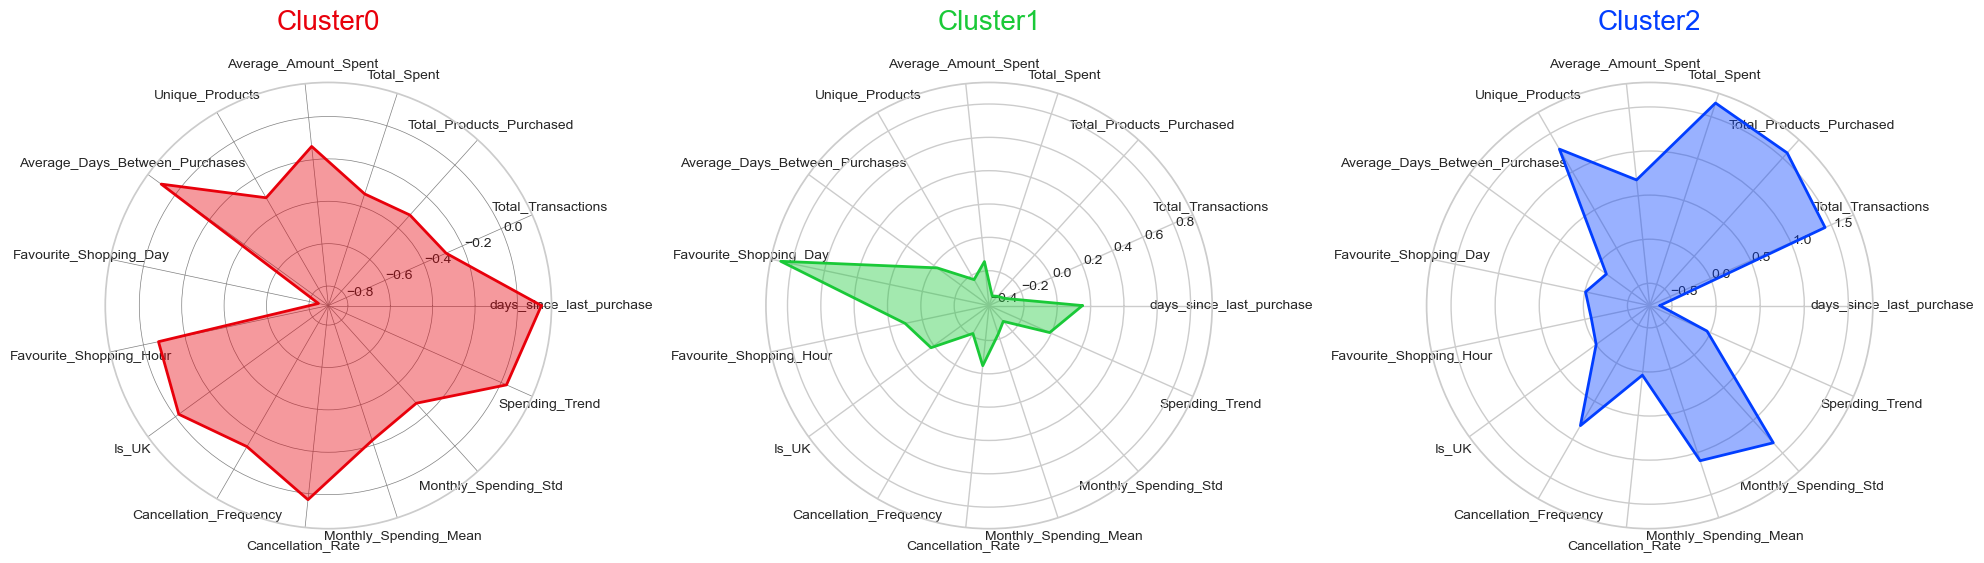

In [72]:
#Cluster analysis and Profiling
#Radar Chart Approach
#Setting "CustomerID" as the index and creating a new dataframe
df_customer=customer_data_cleaned.set_index("CustomerID")
#Standardize the data(excluding the clusters column)
scalar=StandardScaler()
df_customer_standardized=scaler.fit_transform(df_customer.drop(columns=["clusters"],axis=1))
#Create a new dataframe with standardized values and then add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized["clusters"]=df_customer["clusters"]
#Calculate the clusters of each cluster
cluster_centroids=df_customer_standardized.groupby("clusters").mean()
#Function to create a radar chart
def create_radar_chart(ax,angles,daa,color,cluster):
    #Plot the data and fill the area
    ax.fill(angles,data,color=color,alpha=0.4)
    ax.plot(angles,data,color=color,linewidth=2,linestyle="solid")
    #Add a title
    ax.set_title(f'Cluster{cluster}',size=20,color=color,y=1.1)

#set data
labels=np.array(cluster_centroids.columns)
num_vars=len(labels)
#Compute angle of each axis
angles=np.linspace(0,2*np.pi, num_vars, endpoint=False).tolist()
# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)
# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


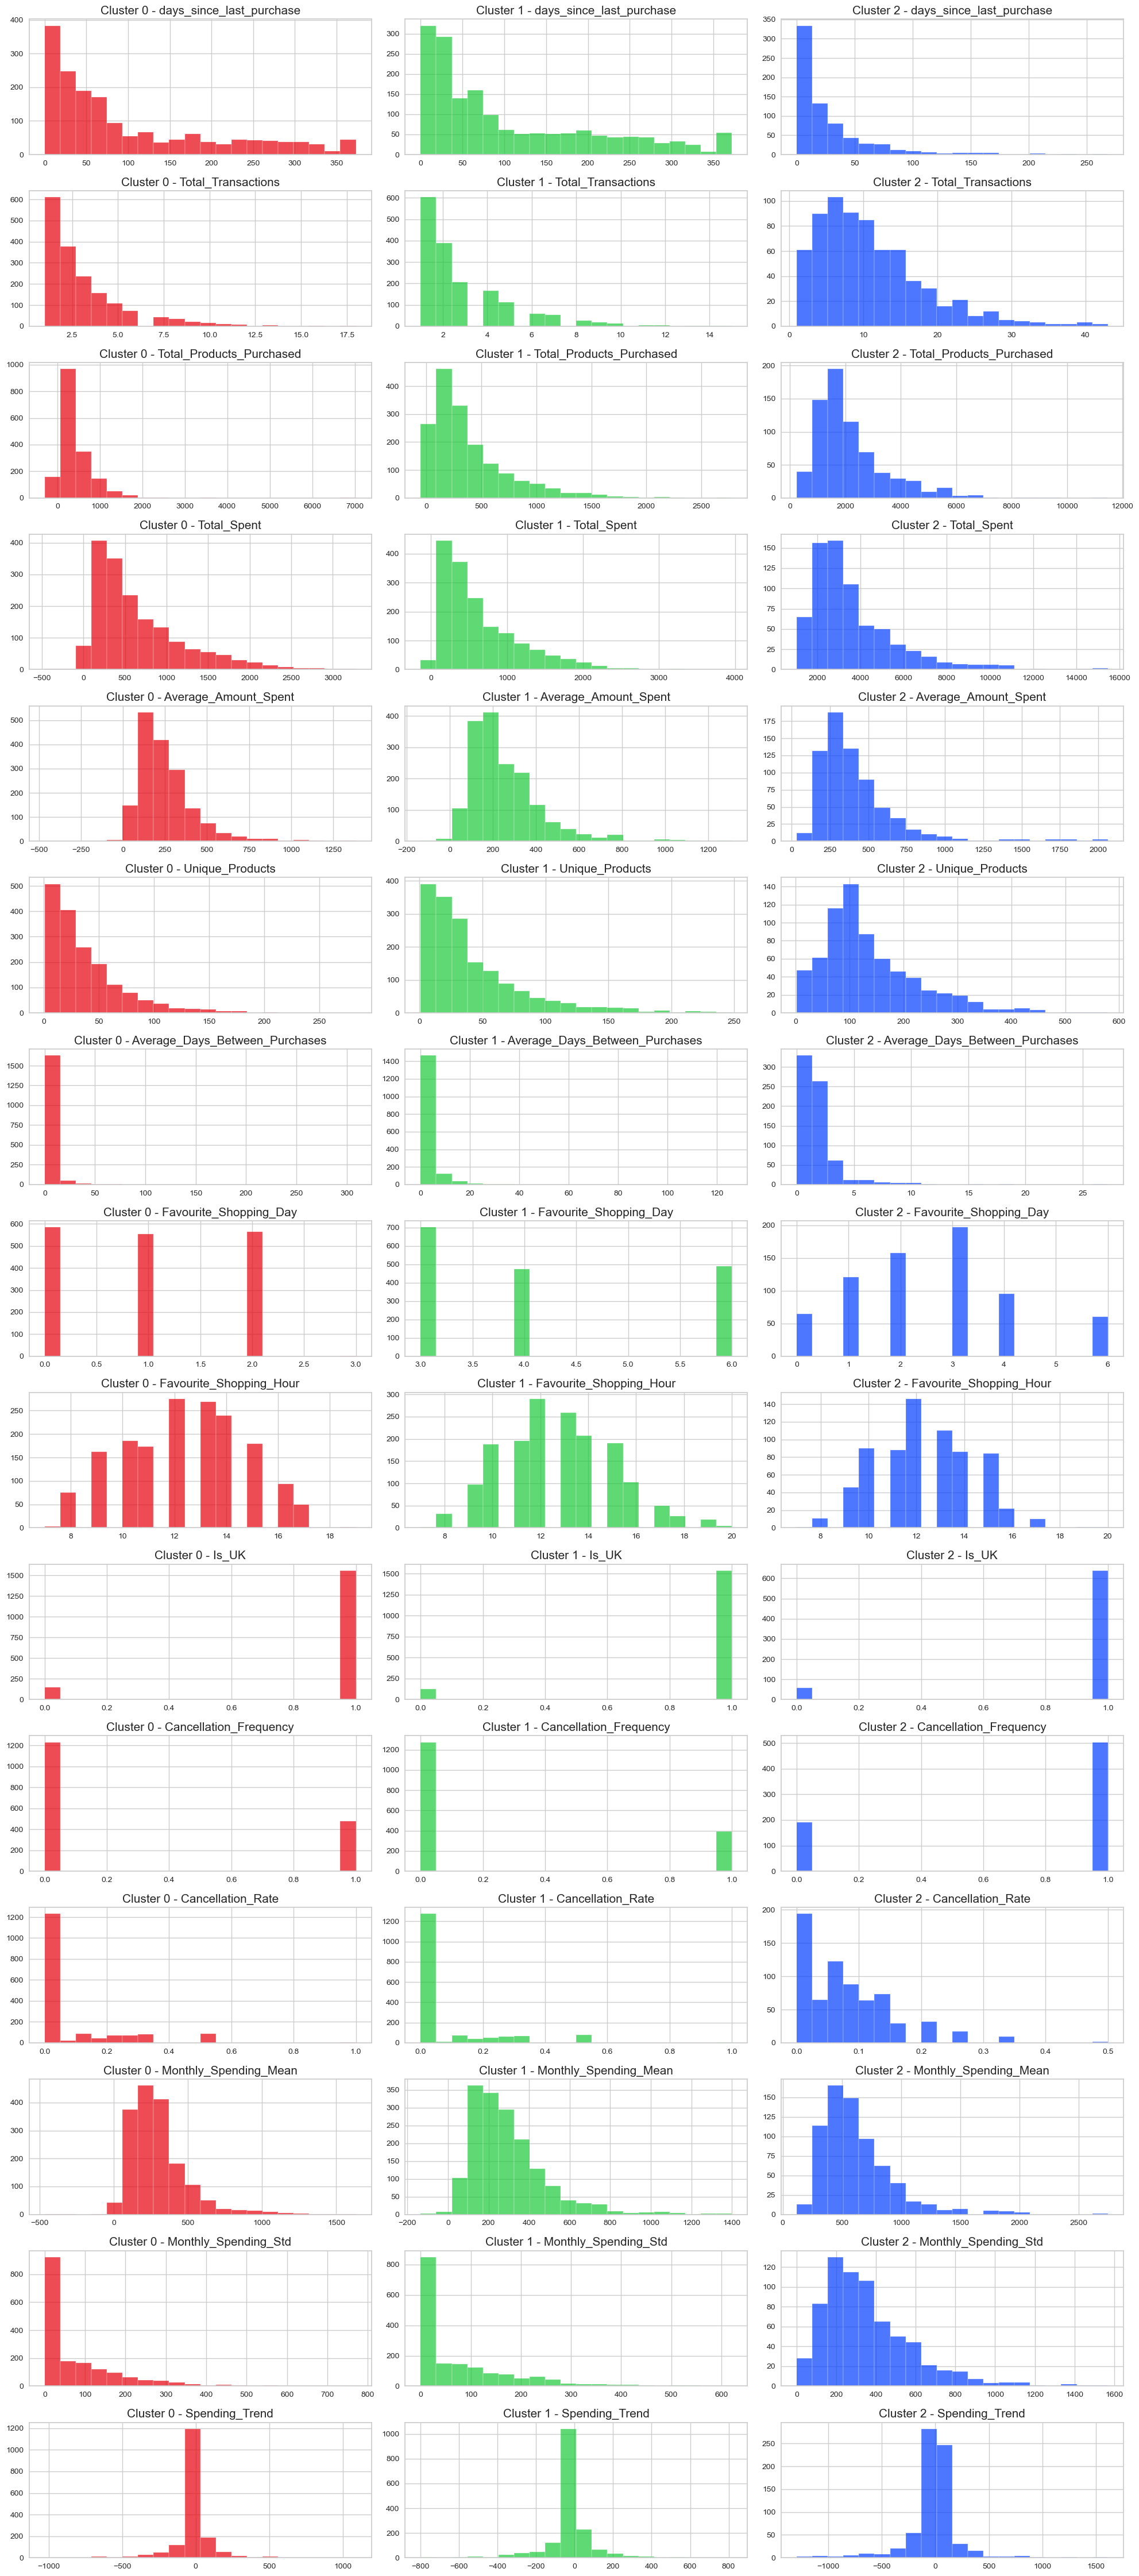

In [73]:
#Histograph Chart Approach
#Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['clusters'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['clusters'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')
# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

In [74]:
#Recommendation System
#Step 1 : Extract the customer ids of the outliers and remove their transactions from the main dataframe
outlier_customer_ids=outliers_data["CustomerID"].astype("float").unique()
df_filtered=df[~df["CustomerID"].isin(outlier_customer_ids)]
#Step 2 : Ensure Consistent dataframe for CustomerID across both dataframes before merging
customer_data_cleaned["CustomerID"]=customer_data_cleaned["CustomerID"].astype("float")
#Step 3 : Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data=df_filtered.merge(customer_data_cleaned[["CustomerID","clusters"]],on="CustomerID",how="inner")
#Step 4 : Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products=merged_data.groupby(["clusters","StockCode","Description"])["Quantity"].sum().reset_index()
best_selling_products=best_selling_products.sort_values(by=["clusters","Quantity"],ascending=[True,False])
top_products_per_cluster=best_selling_products.groupby("clusters").head(10)
#Step 5 : Create a record of products purchased by each customer in each cluster
customer_purchases=merged_data.groupby(["CustomerID","clusters","StockCode"])["Quantity"].sum().reset_index()
#Step 6 : Generate recommendations for each customer in each cluster
recommendations=[]
for cluster in top_products_per_cluster["clusters"].unique():
    top_products=top_products_per_cluster[top_products_per_cluster["clusters"]==cluster]
    customer_in_cluster=customer_data_cleaned[customer_data_cleaned["clusters"]==cluster]["CustomerID"]
    for customer in customer_in_cluster:
        #Identify products already purchased by the customer
        customer_purchased_products=customer_purchases[(customer_purchases["CustomerID"]==customer) &
        (customer_purchases["clusters"]==cluster)]["StockCode"].tolist()
        #Find top 3 products in the best selling list that the customer hasn't purchased yet
        top_products_not_purchased=top_products[~top_products["StockCode"].isin(customer_purchased_products)]
        top_3_products_not_purchased=top_products_not_purchased.head(3)
        #Append the recommendations to the list
        recommendations.append([customer,cluster]+top_3_products_not_purchased[["StockCode","Description"]]
                               .values.flatten().tolist())
#Step 7 : Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df=pd.DataFrame(recommendations,columns=["CustomerID","clusters","Rec1_StockCode",
                                                         "Rec1_Description","Rec2_StockCode","Rec2_Description",
                                                         "Rec3_StockCode","Rec3_Description"])
customer_data_with_recommendations=customer_data_cleaned.merge(recommendations_df,on=
                                                               ["CustomerID","clusters"],how="right")
customer_data_with_recommendations

CustomerID  days_since_last_purchase  Total_Transactions  \
0        12346.0                       325                   2   
1        12350.0                       310                   1   
2        12352.0                        36                   8   
3        12355.0                       214                   1   
4        12358.0                         1                   2   
...          ...                       ...                 ...   
4062     18259.0                        24                   3   
4063     18260.0                       172                   8   
4064     18272.0                         2                   7   
4065     18283.0                         3                  16   
4066     18287.0                        42                   3   

      Total_Products_Purchased  Total_Spent  Average_Amount_Spent  \
0                            0         0.00              0.000000   
1                          196       294.40            294.400000   
2                          463      1265.41            158.176250   
3                          240       459.40            459.400000   
4                          242       928.06            464.030000   
...                        ...          ...                   ...   
4062                       714      2338.60            779.533333   
4063                      1466      2580.15            322.518750   
4064                      2044      3064.78            437.825714   
4065                      1355      2039.58            127.473750   
4066                      1586      1837.28            612.426667   

      Unique_Products  Average_Days_Between_Purchases  Favourite_Shopping_Day  \
0                   1                        0.000000                       1   
1                  16                        0.000000                       2   
2                  57                        3.132530                       1   
3                  13                        0.000000                       0   
4                  12                        9.312500                       1   
...               ...                             ...                     ...   
4062               27                        8.341463                       3   
4063               86                        1.347826                       2   
4064               99                        1.443787                       3   
4065              262                        0.465181                       3   
4066               59                        2.304348                       2   

      Favourite_Shopping_Hour  ...  Monthly_Spending_Mean  \
0                          10  ...               0.000000   
1                          16  ...             294.400000   
2                          14  ...             316.352500   
3                          13  ...             459.400000   
4                          10  ...             464.030000   
...                       ...  ...                    ...   
4062                       14  ...             779.533333   
4063                       10  ...             430.025000   
4064                       12  ...             510.796667   
4065                       14  ...             203.958000   
4066                       10  ...             918.640000   

      Monthly_Spending_Std  Spending_Trend  clusters  Rec1_StockCode  \
0                 0.000000        0.000000         0           84879   
1                 0.000000        0.000000         0           84879   
2               134.700629        9.351000         0           84879   
3                 0.000000        0.000000         0           84879   
4                83.679016      118.340000         0           84879   
...                    ...             ...       ...             ...   
4062            360.435020      347.050000         2           22616   
4063            113.008090       13.640857         2           22616   
4064            347.331812    

In [75]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

Rec1_StockCode                   Rec1_Description Rec2_StockCode  \
CustomerID                                                                    
15841.0             84879      ASSORTED COLOUR BIRD ORNAMENT          18007   
15831.0             84879      ASSORTED COLOUR BIRD ORNAMENT          18007   
17242.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
17198.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
15019.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS          84879   
14368.0             84879      ASSORTED COLOUR BIRD ORNAMENT          18007   
15179.0             22616         PACK OF 12 LONDON TISSUES           84879   
17513.0             84879      ASSORTED COLOUR BIRD ORNAMENT          18007   
17861.0            85099B            JUMBO BAG RED RETROSPOT          84879   
13144.0             84879      ASSORTED COLOUR BIRD ORNAMENT          18007   

                               Rec2_Description Rec3_StockCode  \
CustomerID                                                       
15841.0     ESSENTIAL BALM 3.5G TIN IN ENVELOPE          17003   
15831.0     ESSENTIAL BALM 3.5G TIN IN ENVELOPE         85123A   
17242.0           ASSORTED COLOUR BIRD ORNAMENT          15036   
17198.0           ASSORTED COLOUR BIRD ORNAMENT          15036   
15019.0           ASSORTED COLOUR BIRD ORNAMENT          15036   
14368.0     ESSENTIAL BALM 3.5G TIN IN ENVELOPE         85123A   
15179.0           ASSORTED COLOUR BIRD ORNAMENT          22178   
17513.0     ESSENTIAL BALM 3.5G TIN IN ENVELOPE         85123A   
17861.0           ASSORTED COLOUR BIRD ORNAMENT          22178   
13144.0     ESSENTIAL BALM 3.5G TIN IN ENVELOPE         85123A   

                              Rec3_Description  
CustomerID                                      
15841.0                    BROCADE RING PURSE   
15831.0     WHITE HANGING HEART T-LIGHT HOLDER  
17242.0              ASSORTED COLOURS SILK FAN  
17198.0              ASSORTED COLOURS SILK FAN  
15019.0              ASSORTED COLOURS SILK FAN  
14368.0     WHITE HANGING HEART T-LIGHT HOLDER  
15179.0        VICTORIAN GLASS HANGING T-LIGHT  
17513.0     WHITE HANGING HEART T-LIGHT HOLDER  
17861.0        VICTORIAN GLASS HANGING T-LIGHT  
13144.0     WHITE HANGING HEART T-LIGHT HOLDER